In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import yfinance as yf
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [31]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-28,33907.722656,34399.390625,33874.804688,34089.574219,34089.574219,10160330825
2023-10-29,34089.371094,34743.261719,33947.566406,34538.480469,34538.480469,11160323986
2023-10-30,34531.742188,34843.933594,34110.972656,34502.363281,34502.363281,17184860315
2023-10-31,34500.078125,34719.253906,34083.308594,34667.781250,34667.781250,15758270810
2023-11-01,34657.273438,34977.363281,34334.988281,34583.203125,34583.203125,16732184576


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,14121.967402,14456.374119,13759.710044,14130.848917,14130.848917,1.646411e+10
std,15971.453587,16362.059185,15529.910772,15970.528087,15970.528087,1.922235e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,834.179993,899.398010,823.556030,864.539978,864.539978,1.419700e+08
50%,8091.830078,8261.941406,7884.709961,8103.911133,8103.911133,1.079610e+10
75%,22757.267578,23213.312500,22331.314453,22777.625000,22777.625000,2.703978e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2014-09-17 to 2023-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


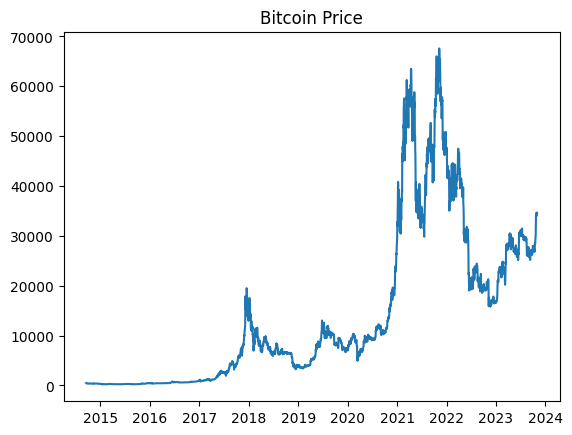

In [7]:
plt.plot(df.index, df['Adj Close'])
plt.title('Bitcoin Price')
plt.show()

In [8]:
tr_data = list(df[0:int(len(df)*0.8)]['Adj Close'])
tst_data = list(df[int(len(df)*0.8):]['Adj Close'])


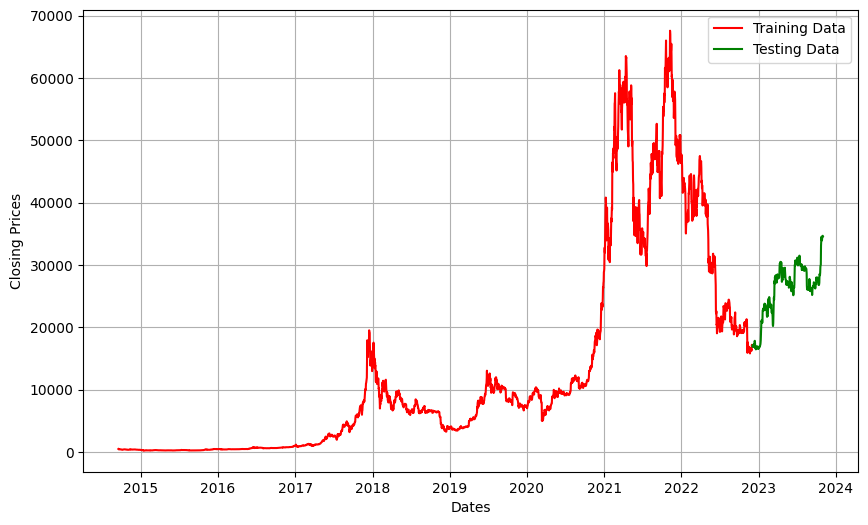

In [9]:
#split the training and testing data and visualize the data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:int(len(df)*0.9)]['Adj Close'], 'red', label='Training Data')
plt.plot(df[int(len(df)*0.9):]['Adj Close'], 'green', label='Testing Data')
plt.legend()

In [10]:
model_prediction = []
num_test_obs = len(tst_data)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
for i in range(num_test_obs):
    model = ARIMA(tr_data, order=(5, 1, 0))
    output = model.fit().forecast(steps=1)
    yhat = output[0]
    model_prediction.append(yhat)
    actual_tst_value = tst_data[i]
    
    tr_data.append(actual_tst_value)


In [13]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3332
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -26900.467
Date:                Wed, 01 Nov 2023   AIC                          53812.933
Time:                        21:05:33   BIC                          53849.599
Sample:                             0   HQIC                         53826.052
                               - 3332                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0235      0.009     -2.606      0.009      -0.041      -0.006
ar.L2          0.0089      0.009      1.020      0.308      -0.008       0.026
ar.L3          0.0212      0.009      2.246      0.025       0.003       0.040
ar.L4          0.0320      0.008      4.130      0.000       0.017       0.047
ar.L5          0.0139      0.008      1.660      0.097      -0.003       0.030
sigma2      6.063e+05   4902.305    123.686      0.000    5.97e+05    6.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             39795.95
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             446.64   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

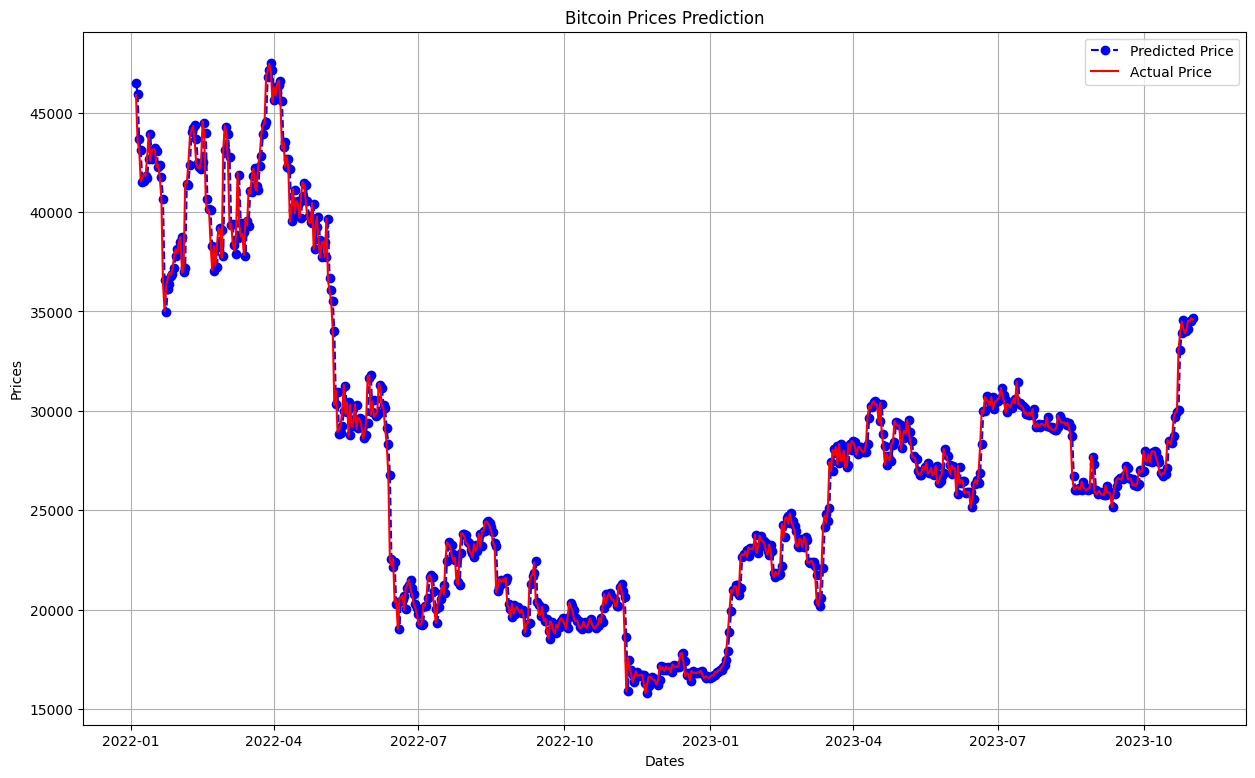

In [20]:
plt.figure(figsize=(15,9))

plt.grid(True)
date_range = df[int(len(df)*0.8):].index

plt.plot(date_range, model_prediction, color = 'blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(date_range, tst_data, color = 'red',label='Actual Price')

plt.title('Bitcoin Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()



In [30]:
pred = model.fit().forecast(steps=62)
print(pred[0])


34675.416290091736
